# Modelo de regresión lineal múltiple para el valor de Bitcoin.

Analizaremos la correlación que existe entre valor de Bitcoin y las siguientes variables:
-Volumen de transacciones de Bitcoin
-Valor del S&P500
-Volumen de transacciones del S&P500

Aplicaremos un modelo de regresión lineal múltiple para verificar la significancia de cada variable.
A continuación se realizará un segundo modelo tomando los datos posteriores al invierno cripto.
Finalmente se observaran los puntos de influencia y los atípicos, usaremos el ajuste Leverage vs Distancia de Cook para eliminar aquellos que consideremos puedan afectar el modelo


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

In [ ]:
dataSP = yf.download("^GSPC", start = "2015-01-01", end = "2024-12-31")
dataSP.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2015-01-02,2058.199951,2072.360107,2046.040039,2058.899902,2708700000
2015-01-05,2020.579956,2054.439941,2017.339966,2054.439941,3799120000
2015-01-06,2002.609985,2030.250000,1992.439941,2022.150024,4460110000
2015-01-07,2025.900024,2029.609985,2005.550049,2005.550049,3805480000
2015-01-08,2062.139893,2064.080078,2030.609985,2030.609985,3934010000


In [ ]:
dataSP.columns

MultiIndex([( 'Close', '^GSPC'),
            (  'High', '^GSPC'),
            (   'Low', '^GSPC'),
            (  'Open', '^GSPC'),
            ('Volume', '^GSPC')],
           names=['Price', 'Ticker'])

In [ ]:
#dataSP[('Close', '^GSPC'), ('Volume', '^GSPC')]
df1 = dataSP[[('Close', '^GSPC'), ('Volume', '^GSPC')]]

In [ ]:
dataBIT = yf.download("BTC-USD", start = "2015-01-01", end = "2024-12-31")
dataBIT.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2015-01-01,314.248993,320.434998,314.002991,320.434998,8036550
2015-01-02,315.032013,315.838989,313.565002,314.079010,7860650
2015-01-03,281.082001,315.149994,281.082001,314.846008,33054400
2015-01-04,264.195007,287.230011,257.612000,281.145996,55629100
2015-01-05,274.473999,278.341003,265.084015,265.084015,43962800


In [ ]:
df2 = dataBIT[[('Close', 'BTC-USD'), ('Volume', 'BTC-USD')]]

In [ ]:
data = pd.merge(df1, df2, how = 'inner', on = 'Date')
data.head()

Price,Close,Volume,Close,Volume
Ticker,^GSPC,^GSPC,BTC-USD,BTC-USD
Date,,,,
2015-01-02,2058.199951,2708700000,315.032013,7860650
2015-01-05,2020.579956,3799120000,274.473999,43962800
2015-01-06,2002.609985,4460110000,286.188995,23245700
2015-01-07,2025.900024,3805480000,294.337006,24866800
2015-01-08,2062.139893,3934010000,283.348999,19982500


In [ ]:
data.isna().sum()

,,0
Price,Ticker,
Close,^GSPC,0
Volume,^GSPC,0
Close,BTC-USD,0
Volume,BTC-USD,0


In [ ]:
data.describe()

Price,Close,Volume,Close,Volume
Ticker,^GSPC,^GSPC,BTC-USD,BTC-USD
count,2515.000000,2.515000e+03,2515.000000,2.515000e+03
mean,3355.120803,4.007382e+09,20116.448887,2.074767e+10
std,1082.942998,9.540128e+08,22148.085610,2.193578e+10
min,1829.079956,1.296530e+09,178.102997,7.860650e+06
25%,2432.114990,3.428805e+09,2583.040039,1.263135e+09
50%,3004.520020,3.820250e+09,9656.717773,1.735319e+10
75%,4204.209961,4.341740e+09,32041.303711,3.248118e+10
max,6090.270020,9.976520e+09,106140.601562,3.509679e+11


In [ ]:
data.corr()

,Price,Close,Volume,Close,Volume
,Ticker,^GSPC,^GSPC,BTC-USD,BTC-USD
Price,Ticker,,,,
Close,^GSPC,1.000000,0.145973,0.931425,0.670951
Volume,^GSPC,0.145973,1.000000,0.150485,0.375705
Close,BTC-USD,0.931425,0.150485,1.000000,0.700543
Volume,BTC-USD,0.670951,0.375705,0.700543,1.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='Price-Ticker', ylabel='Price-Ticker'>

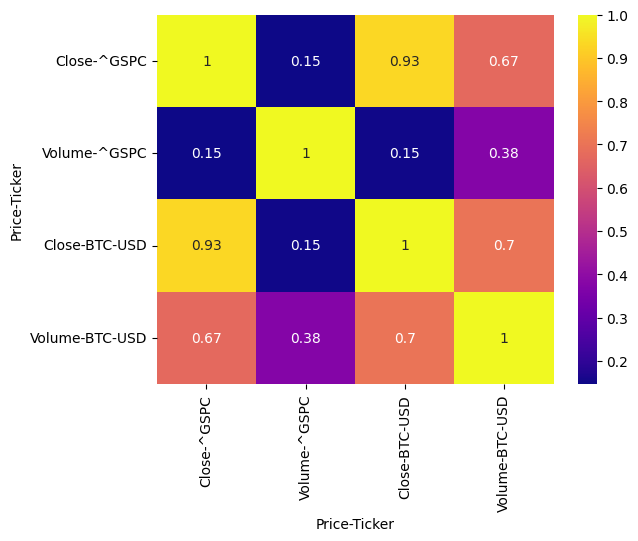

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap= 'plasma')

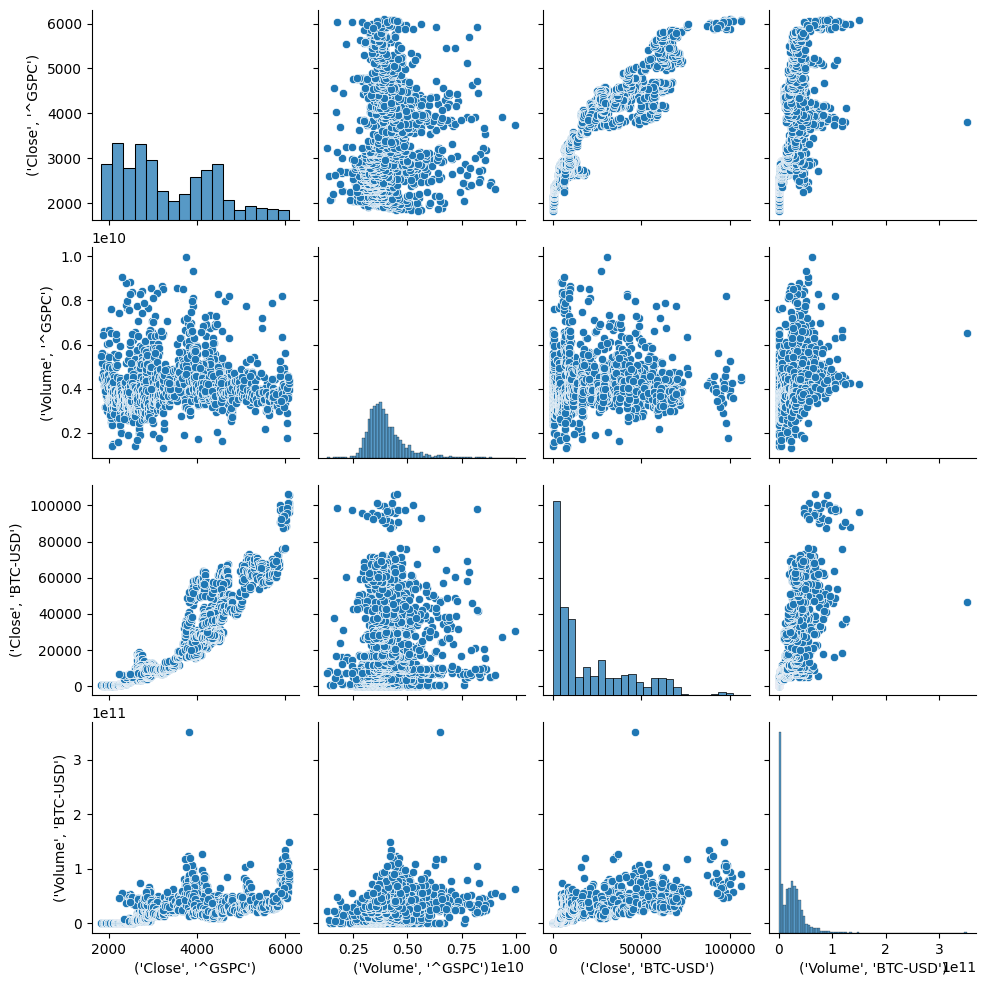

In [ ]:
sns.pairplot(data)

In [ ]:
data.columns

MultiIndex([( 'Close',   '^GSPC'),
            ('Volume',   '^GSPC'),
            ( 'Close', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [ ]:
data.columns = ['SP500_Close', 'SP500_Volume','Bitcoin_Close','Bitcoin_Volume']
data.head()

,SP500_Close,SP500_Volume,Bitcoin_Close,Bitcoin_Volume
Date,,,,
2015-01-02,2058.199951,2708700000,315.032013,7860650
2015-01-05,2020.579956,3799120000,274.473999,43962800
2015-01-06,2002.609985,4460110000,286.188995,23245700
2015-01-07,2025.900024,3805480000,294.337006,24866800
2015-01-08,2062.139893,3934010000,283.348999,19982500


In [ ]:
from sklearn.model_selection import train_test_split

X = data[['SP500_Close']]
y = data[[('Bitcoin_Close')]]
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size = 0.75,
                                        random_state =123,
                                        shuffle = True)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1886, 1)
(629, 1)
(1886, 1)
(629, 1)


In [ ]:
import statsmodels as sms
import statsmodels.formula.api as smf

data_train = pd.DataFrame(np.hstack((X_train, y_train)), columns=['SP500_Close', 'Bitcoin_Close'])
modelo = smf.ols(formula = 'Bitcoin_Close ~ SP500_Close', data = data_train)
modelo = modelo.fit()

print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:          Bitcoin_Close   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                 1.223e+04
Date:                Sun, 16 Mar 2025   Prob (F-statistic):               0.00
Time:                        02:06:25   Log-Likelihood:                -19633.
No. Observations:                1886   AIC:                         3.927e+04
Df Residuals:                    1884   BIC:                         3.928e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.355e+04    600.081    -72.568      

In [ ]:
print(f"R cuadrada adjustada:{modelo.rsquared_adj}")
print(f"R cuadrada:{modelo.rsquared}")

R cuadrada adjustada:0.866448392683064
R cuadrada:0.8665192423421181


In [ ]:
parametros = modelo.params
parametros

,0
Intercept,-43546.895177
SP500_Close,18.967146


# Interpretación
R-cuadrada nos dice que el modelo se ajusta bastante
F y p muestran que no hay ninguna relación entre las medias del S&P 500 y el valor de BITCOIN
Sin embargo AIC y BIC son muy altos, y Log-Likelihood es muy alto en negativo por lo que el modelo no es necesariamente bueno para predecir el valor de BITCOIN. Sin embargo esto también puede deberse a la escala de los valores ya que las variables no fueron normalizadas.
Adicionalmente vemos que Prob(Omnibus) es suficientemente pequeño para afirmar que la variable es significativa y además existe variabilidad en la normalidad.
La Kurtosis indica que hay datos muy extremos lo cual es obvio.
Durbin-Watson nos dice que no hay una autocorrelación entre los errores
Jarque-Bera y Prob (JB) nos indica que los datos no siguen una distribución normal lo cual es esperado

Ahora también obtenemos los valores de $\beta_0$ y $\beta_1$, en particular vemos que el valor de $P>|t|$ es sificientemente pequeño para descartar la hipótesis nula, es decir, tenemos evidencia suficiente para afirmar que $\beta_1$ es distinto de $0$.

In [ ]:
print(f"Los coeficientes son\\:{modelo.params}")
print(f"Beta_0:{modelo.params[0]}")
print(f"Beta_1:{modelo.params[1]}")


Los coeficientes son\:Intercept     -43546.895177
SP500_Close       18.967146
dtype: float64
Beta_0:-43546.8951767323
Beta_1:18.967145510439522


<ipython-input-21-4a246bc7236c>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Beta_0:{modelo.params[0]}")
<ipython-input-21-4a246bc7236c>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Beta_1:{modelo.params[1]}")


In [ ]:
modelo.conf_int(0.05)

,0,1
Intercept,-44723.789318,-42370.001036
SP500_Close,18.630782,19.303509


In [ ]:
print(modelo. predict())

[63587.12767217 22545.0726378  50824.32253649 ... 45523.76479305
 11959.69673284 12023.04866588]


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style

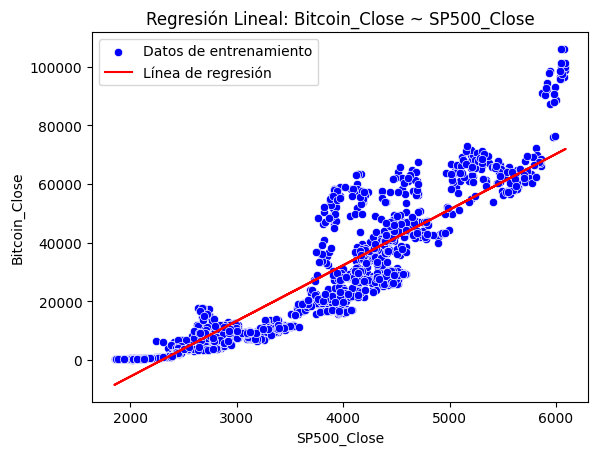

In [ ]:
sns.scatterplot(x='SP500_Close', y='Bitcoin_Close', data=data_train, color ='blue', label='Datos de entrenamiento')

plt.plot(data_train['SP500_Close'], modelo.predict(data_train['SP500_Close']), color='red', label='Línea de regresión')

plt.xlabel('SP500_Close')
plt.ylabel('Bitcoin_Close')
plt.title('Regresión Lineal: Bitcoin_Close ~ SP500_Close')
plt.legend()

plt.show()

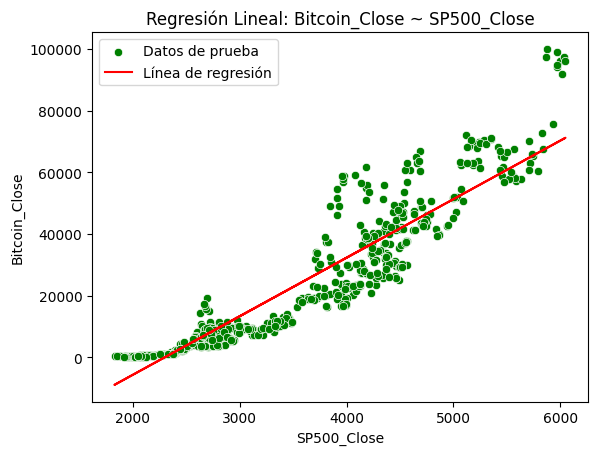

In [ ]:
data_test = pd.DataFrame(np.hstack((X_test, y_test)), columns=['SP500_Close', 'Bitcoin_Close'])
sns.scatterplot(x='SP500_Close', y='Bitcoin_Close', data=data_test, color ='green', label='Datos de prueba')

plt.plot(data_test['SP500_Close'], modelo.predict(data_test['SP500_Close']), color='red', label='Línea de regresión')

plt.xlabel('SP500_Close')
plt.ylabel('Bitcoin_Close')
plt.title('Regresión Lineal: Bitcoin_Close ~ SP500_Close')
plt.legend()

plt.show()

Text(0.5, 1.0, 'Fitted vs Observed')

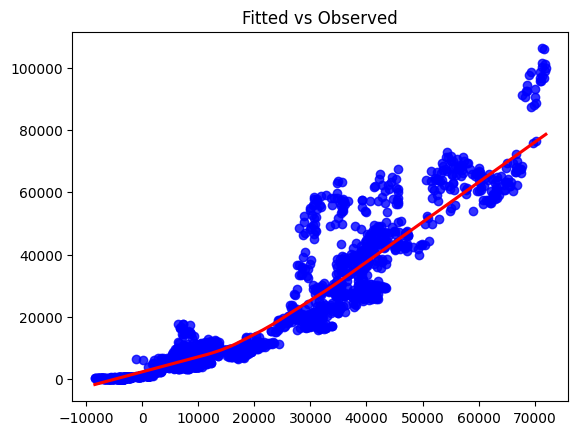

In [ ]:
import matplotlib.pyplot as plt

resid_val = modelo.resid
fitted_val= modelo.predict()
sns.regplot(x=fitted_val,y = y_train, color='blue', lowess=True, line_kws={'color':'red'})
plt.title('Fitted vs Observed')


Text(0.5, 1.0, 'Fitted vs Residuals')

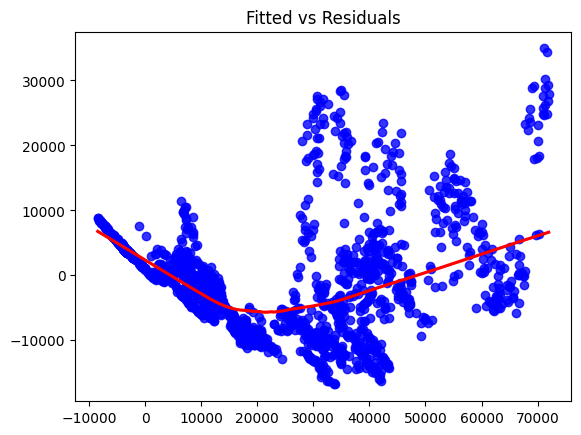

In [ ]:
sns.regplot(x=fitted_val,y = resid_val, color='blue', lowess=True, line_kws={'color':'red'})
plt.title('Fitted vs Residuals')

Text(0.5, 1.0, 'Fitted vs Residuals stand')

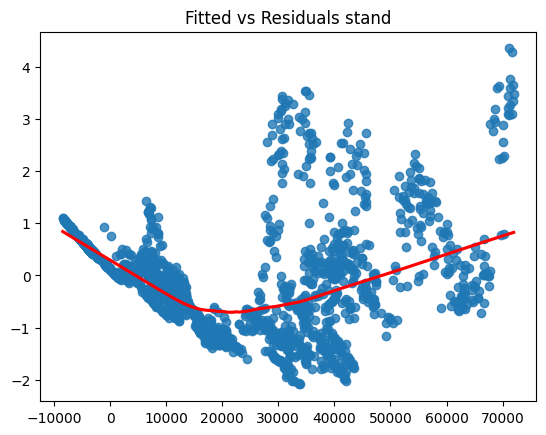

In [ ]:
resid_stand= modelo.get_influence().resid_studentized_internal
sns.regplot(x=fitted_val,y = resid_stand, lowess=True, line_kws={'color':'red'})
plt.title('Fitted vs Residuals stand')

valores límite de apalancamiento:  0.0015904572564612327


0.0015904572564612327

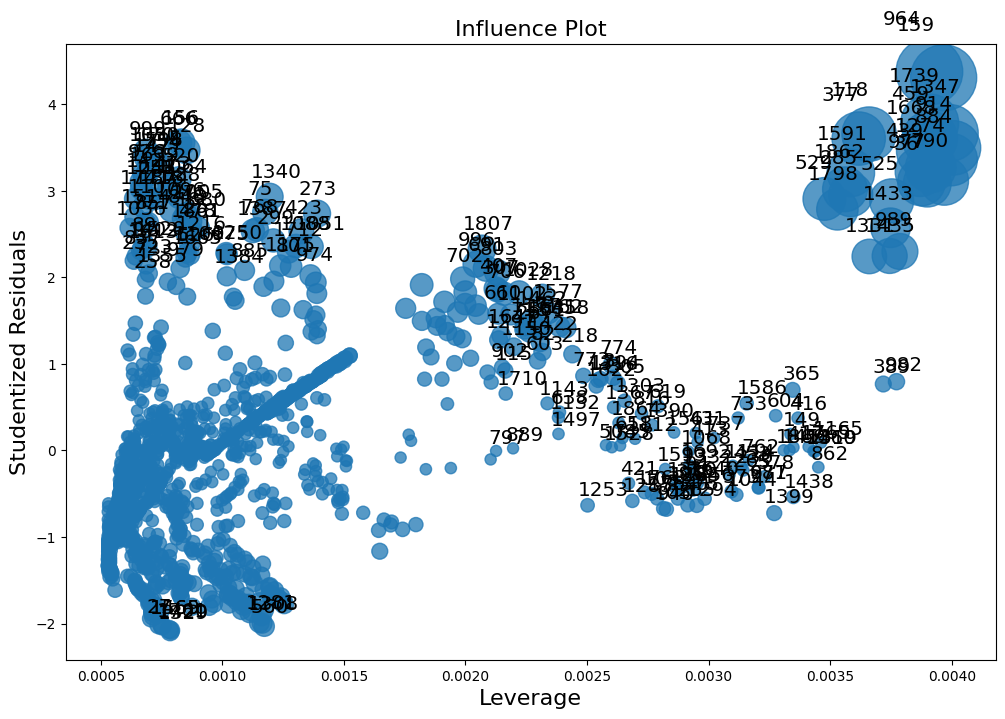

In [ ]:
import statsmodels.api as sm

fig, ax = plt.subplots(figsize=(12, 8))
sm.graphics.influence_plot(modelo, alpha = 0.05, ax=ax, criterion="cooks")

print("valores límite de apalancamiento: ", (2*(X.shape[1]+1))/X.shape[0])

2*(X.shape[1]+1)/X.shape[0]

In [ ]:
X_train_cte = sm.add_constant(X_train, prepend=True)
modelo_sci = sm.OLS(y_train, X_train)
modelo_sci = modelo_sci.fit()
print(modelo_sci.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.718
Model:                            OLS   Adj. R-squared (uncentered):              0.718
Method:                 Least Squares   F-statistic:                              4792.
Date:                Sun, 16 Mar 2025   Prob (F-statistic):                        0.00
Time:                        02:07:06   Log-Likelihood:                         -20890.
No. Observations:                1886   AIC:                                  4.178e+04
Df Residuals:                    1885   BIC:                                  4.179e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Segundo modelo
Ahora eliminaremos el Evento Winter Cripto de los datos.

 El "invierno cripto" fue un fenómeno durante el cual se desplomó el valor de todas las criptomonedas. Esto  ocurrió en el año 2022, comenzó a intensificarse a partir de mayo, con un punto crítico en noviembre. Las causas principales fueron las siguientes:
 Causas:

  -Colapso de Terra (LUNA): En mayo de 2022, el stablecoin algorítmico UST y su criptomoneda LUNA colapsaron, generando pérdidas de más de $40 mil millones y erosionando la confianza en el mercado.

  -Quiebra de FTX: En noviembre de 2022, el exchange FTX, uno de los más grandes, colapsó debido a malas prácticas financieras y falta de liquidez, lo que generó un efecto dominó en el mercado.

  -Aumento de tasas de interés: La Reserva Federal de EE.UU. subió las tasas de interés para combatir la inflación, reduciendo el apetito por activos de riesgo como las criptomonedas.

  Consecuencias Principales

  -Bitcoin: Cayó de un máximo histórico de ~69,000(noviembre2021)a 69,000(noviembre2021)a 15,500 (noviembre 2022), una caída del ~77%.

  -Criptomonedas en general: El mercado global de criptomonedas perdió más de $2 billones en valor. Ethereum y otras altcoins también sufrieron caídas significativas.

  -Consecuencias económicas: Miles de inversores y empresas relacionadas con criptomonedas enfrentaron pérdidas masivas, despidos y quiebras.

  Este evento extraordinario podría tener efectos sobre la correlación de las variables y en el modelo lo que estudiaremos a continuación.

In [ ]:
data2 = data['2022-06-01' :]

In [ ]:
data2.describe()

,SP500_Close,SP500_Volume,Bitcoin_Close,Bitcoin_Volume
count,649.000000,6.490000e+02,649.000000,6.490000e+02
mean,4641.387769,4.062367e+09,41226.754159,3.257676e+10
std,698.453474,8.143451e+08,22109.334132,1.936915e+10
min,3577.030029,1.639500e+09,15787.284180,9.392909e+09
25%,4060.429932,3.624910e+09,23264.291016,2.053536e+10
50%,4443.950195,3.923560e+09,30027.296875,2.857554e+10
75%,5224.620117,4.284600e+09,61276.691406,3.845236e+10
max,6090.270020,9.354280e+09,106140.601562,1.492189e+11


In [ ]:
data2.corr()

,SP500_Close,SP500_Volume,Bitcoin_Close,Bitcoin_Volume
SP500_Close,1.000000,-0.207590,0.947618,0.436272
SP500_Volume,-0.207590,1.000000,-0.130769,0.220397
Bitcoin_Close,0.947618,-0.130769,1.000000,0.563569
Bitcoin_Volume,0.436272,0.220397,0.563569,1.000000


<Axes: >

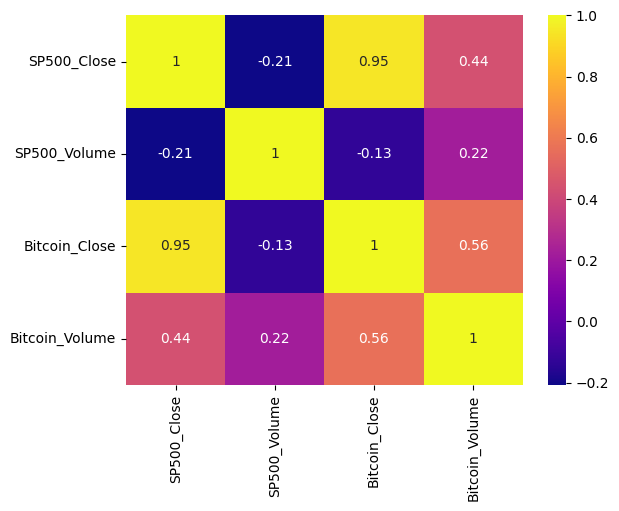

In [ ]:
sns.heatmap(data2.corr(), annot=True, cmap= 'plasma')

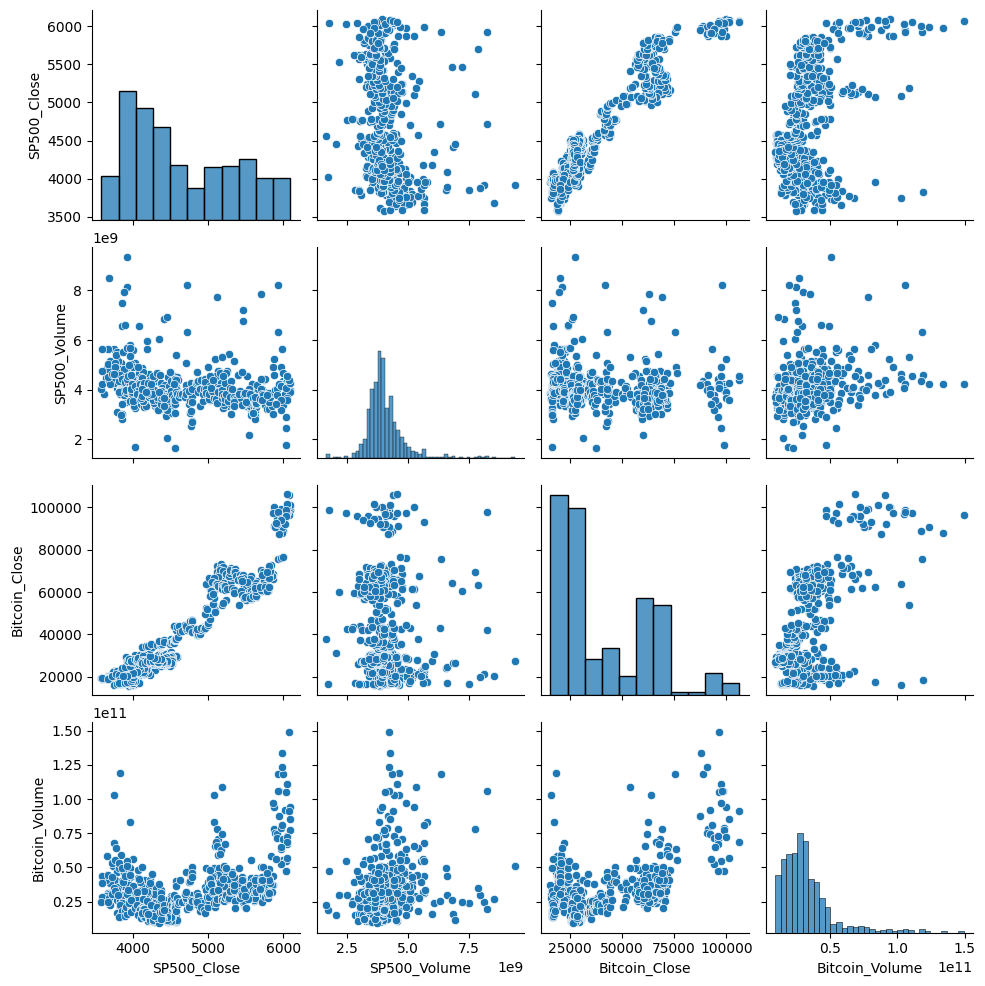

In [ ]:
sns.pairplot(data2)

In [ ]:
from sklearn.model_selection import train_test_split

X2 = data2[['SP500_Close']]
y2 = data2[[('Bitcoin_Close')]]
X2_train, X2_test, y2_train, y2_test = train_test_split(
                                        X2.values.reshape(-1,1),
                                        y2.values.reshape(-1,1),
                                        train_size = 0.75,
                                        random_state =123,
                                        shuffle = True)

In [ ]:
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(486, 1)
(163, 1)
(486, 1)
(163, 1)


In [ ]:
data2_train = pd.DataFrame(np.hstack((X2_train, y2_train)), columns=['SP500_Close', 'Bitcoin_Close'])
modelo2 = smf.ols(formula = 'Bitcoin_Close ~ SP500_Close', data = data2_train)
modelo2 = modelo2.fit()

print(modelo2.summary())


                            OLS Regression Results                            
Dep. Variable:          Bitcoin_Close   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     4373.
Date:                Sun, 16 Mar 2025   Prob (F-statistic):          1.60e-244
Time:                        02:07:31   Log-Likelihood:                -4992.4
No. Observations:                 486   AIC:                             9989.
Df Residuals:                     484   BIC:                             9997.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.701e+04   2121.345    -45.732      

# Interpretación General

Los cambios observados indican que:

  -Eliminar el periodo afectado por el evento particular fue una decisión acertada, ya que los datos distorsionaban el modelo original.

   -El nuevo modelo es más preciso (R-cuadrada más alta), tiene un mejor ajuste (Log-Likelihood menos negativo) y es más eficiente (AIC y BIC más bajos).

  -La autocorrelación en los residuos se redujo (Durbin-Watson más cercano a 2), lo que mejora la validez del modelo.

# Modelo múltiple

In [ ]:
X_orig = pd.DataFrame(data = data2, columns=['SP500_Close', 'SP500_Volume', 'Bitcoin_Volume',])
X_orig.head()

,SP500_Close,SP500_Volume,Bitcoin_Volume
Date,,,
2022-06-01,4101.229980,4531800000,41135817341
2022-06-02,4176.819824,4405790000,29083562061
2022-06-03,4108.540039,3711110000,26175547452
2022-06-06,4121.430176,4332700000,31947336829
2022-06-07,4160.680176,4248210000,40770974039


In [ ]:
y_orig = pd.DataFrame(data = data2, columns=['Bitcoin_Close'])
y_orig.head()

,Bitcoin_Close
Date,
2022-06-01,29799.080078
2022-06-02,30467.488281
2022-06-03,29704.390625
2022-06-06,31370.671875
2022-06-07,31155.478516


In [ ]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(X_orig, y_orig, random_state=123,train_size = 0.75)
df = pd.concat([Xm_train,ym_train], axis=1)
print(Xm_train.shape)
print(Xm_test.shape)
print(ym_train.shape)
print(ym_test.shape)

(486, 3)
(163, 3)
(486, 1)
(163, 1)


In [ ]:
Xm_train = sm.add_constant(Xm_train, prepend=True)
modelo_mul = sm.OLS(ym_train, Xm_train)
modelo_mul = modelo_mul.fit()
print(modelo_mul.summary())

                            OLS Regression Results                            
Dep. Variable:          Bitcoin_Close   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     2014.
Date:                Sun, 16 Mar 2025   Prob (F-statistic):          3.37e-272
Time:                        02:07:45   Log-Likelihood:                -4919.6
No. Observations:                 486   AIC:                             9847.
Df Residuals:                     482   BIC:                             9864.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -9.349e+04   2689.120    -34.

In [ ]:
# Normalidad de los errores
resid_val = modelo_mul.resid
fitted_val = modelo_mul.predict()
print(f"Medida de los residuales: {modelo_mul.resid.mean()}")
print(f"Desviación estándar de los residuales: {modelo_mul.resid.std()}")

Medida de los residuales: -6.488613085641617e-05
Desviación estándar de los residuales: 6031.748072335122


In [ ]:
from statsmodels.stats.stattools import jarque_bera

stat, pvalue, _, _= jarque_bera(resid_val)
print(f"Estadístico de Jarque-Bera: {stat: .4f}")
print(f"Valor p: {pvalue: .4f}")

if pvalue > 0.05:
  print("No se rechaza Ho: Los residuos parecen normales")
else:
  print("Se rechaza H0: Los residuos NO son normales")

Estadístico de Jarque-Bera:  2.7290
Valor p:  0.2555
No se rechaza Ho: Los residuos parecen normales


Text(0.5, 1.0, 'Fitted vs Observed')

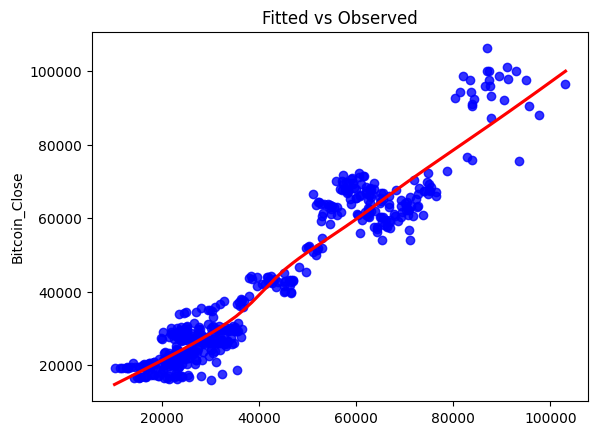

In [ ]:
sns.regplot(x=fitted_val, y=ym_train, color = "blue", lowess=True, line_kws={'color': 'red'})
plt.title('Fitted vs Observed')

# Heterocedasticidad

## Hipótesis:

- $H_0$: Los residuos tienen varianza constante (homocedasticidad).
- $H_1$: La varianza de los residuos no es constante (heterocedasticidad).

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp = het_breuschpagan(resid_val, modelo_mul.model.exog)
print(f"Estadístico LM: {bp[0]}")
print(f"Valor p: {bp[1]}")
print(f"Valor F: {bp[2]}")
print(f"Valor p F: {bp[3]}")

Estadístico LM: 110.08490586929739
Valor p: 1.0521146214400622e-23
Valor F: 47.05045142503418
Valor p F: 1.101561775624007e-26


No se rechaza $H_0$

# Atípicos

,const,SP500_Close,SP500_Volume,Bitcoin_Volume
Date,,,,
2024-11-06,1.0,5929.040039,6329530000,118592653963
2024-12-17,1.0,6050.609863,4544500000,68589364868


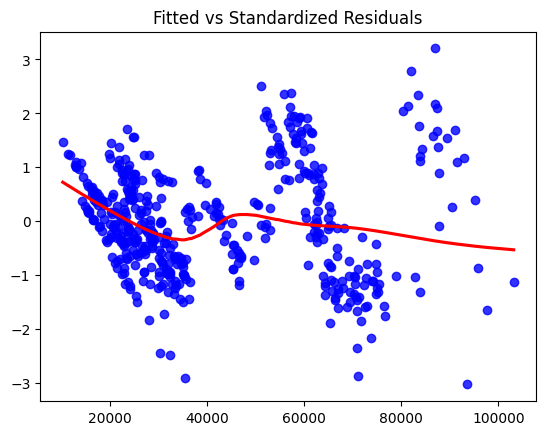

In [ ]:
resid_stand = modelo_mul.get_influence().resid_studentized_internal
sns.regplot(x=fitted_val, y=resid_stand, color = "blue", lowess=True, line_kws={'color': 'red'})
plt.title('Fitted vs Standardized Residuals')

outliers = abs(resid_stand) > 3
Xm_train[outliers]

In [ ]:
inf1 = modelo_mul.get_influence()
distancia_cook = inf1.cooks_distance[0]

umbral = 4/len(Xm_train)
outliers_cook = distancia_cook > umbral

Xm_train[outliers_cook].count()

,0
const,30
SP500_Close,30
SP500_Volume,30
Bitcoin_Volume,30


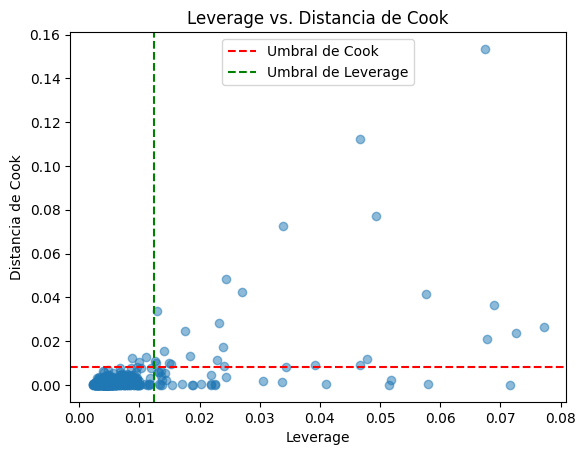

In [ ]:
inf1 = modelo_mul.get_influence()
leverage = inf1.hat_matrix_diag

plt.scatter(leverage, distancia_cook, alpha = 0.5)
plt.xlabel('Leverage')
plt.ylabel('Distancia de Cook')
plt.title('Leverage vs. Distancia de Cook')

plt.axhline(y=umbral, color='r', linestyle='--', label='Umbral de Cook')
plt.axvline(x=2*modelo_mul.df_model/len(Xm_train), color='g', linestyle='--', label='Umbral de Leverage')
plt.legend()
plt.show()

In [ ]:
influencia = modelo_mul.get_influence()

distancia_cook = influencia.cooks_distance[0]

umbral_cook = 4/len(Xm_train)

outliers_cook = np.where(distancia_cook > umbral_cook)[0]

Xm_train.iloc[outliers_cook]

,const,SP500_Close,SP500_Volume,Bitcoin_Volume
Date,,,,
2024-12-06,1.0,6090.270020,3924830000,94534772658
2022-11-11,1.0,3992.929932,5593310000,55871616488
2024-10-09,1.0,5792.040039,3650340000,27670982363
2024-11-29,1.0,6032.379883,2444420000,54968682476
2024-12-30,1.0,5906.939941,3433250000,56188003691
2024-12-12,1.0,6051.250000,3678010000,72073983533
2024-08-05,1.0,5186.330078,5333250000,108991085584
2024-12-19,1.0,5867.080078,4896880000,97221662392
2024-12-04,1.0,6086.490234,4003390000,77199817112


valores limite de apalancamiento: 0.0205761316872428


0.0205761316872428

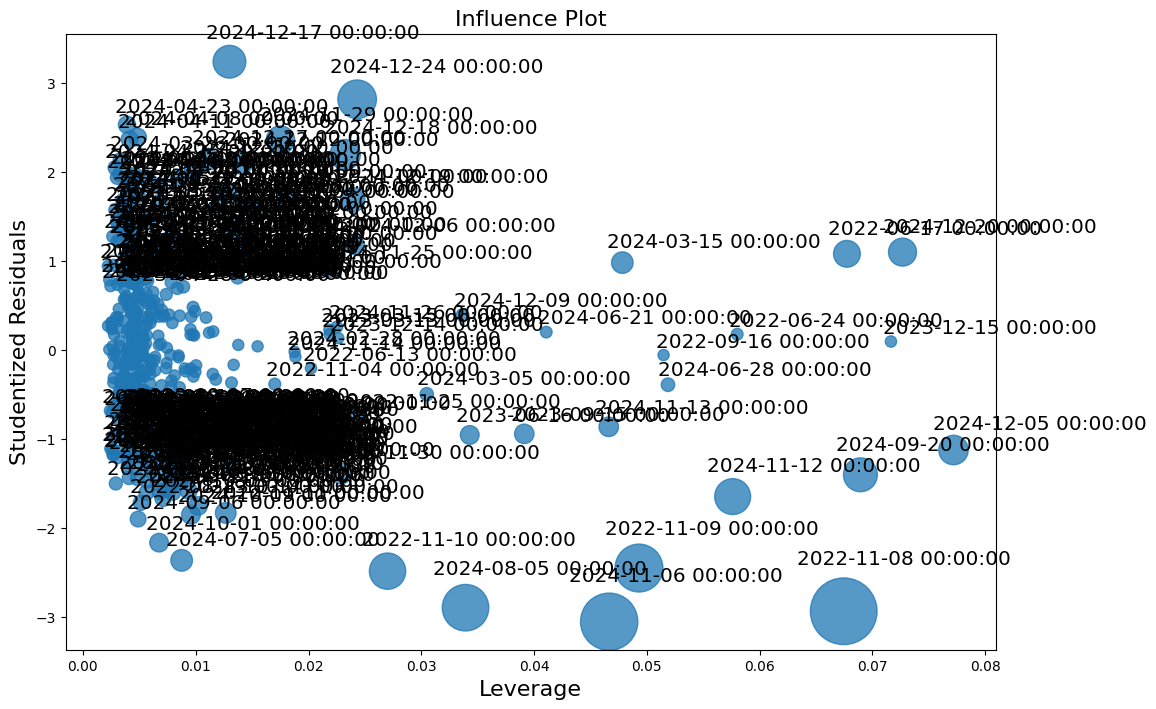

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sm.graphics.influence_plot(modelo_mul,alpha = 0.5, ax=ax, criterion="cooks")

print("valores limite de apalancamiento:", (2*(Xm_train.shape[1]+1))/Xm_train.shape[0])

2*((Xm_train.shape[1]+1)/Xm_train.shape[0])

In [ ]:
Xm_train.loc[['2024-12-17', '2024-11-06']]

,const,SP500_Close,SP500_Volume,Bitcoin_Volume
Date,,,,
2024-12-17,1.0,6050.609863,4544500000,68589364868
2024-11-06,1.0,5929.040039,6329530000,118592653963


In [ ]:
influence = modelo_mul.get_influence()
cooks = influence.cooks_distance

k = cooks[0] > 0.05

Xm_train[k]

ym_train[k]

,Bitcoin_Close
Date,
2024-08-05,53991.457031
2024-11-06,75639.078125
2022-11-09,15880.780273
2022-11-08,18541.271484


In [ ]:
Xm2_train = Xm_train.loc[k!=1, :]  #X[k!=1]

ym2_train = ym_train.loc[k!=1]
print(Xm2_train.shape)
print(ym2_train.shape)

(482, 4)
(482, 1)


In [ ]:
Xm_train.loc[['2024-12-17', '2024-11-06']]
Xm3_train = Xm2_train.drop(['2024-12-17'])
ym3_train = ym2_train.drop(['2024-12-17'])
print(Xm3_train.shape)
print(ym3_train.shape)

(481, 4)
(481, 1)


In [ ]:
Xm4_train = Xm3_train.drop(columns = ["SP500_Volume"])
ym4_train = ym3_train
Xm4_train.head()

,const,SP500_Close,Bitcoin_Volume
Date,,,
2022-10-13,1.0,3669.909912,44219840004
2024-02-16,1.0,5005.569824,28180567298
2023-03-14,1.0,3919.290039,54622230164
2023-09-05,1.0,4496.830078,11094740040
2023-03-27,1.0,3977.530029,18188895178


In [ ]:
modelo_mul2 = sm.OLS(ym4_train, Xm4_train)
modelo_mul2 = modelo_mul2.fit()
print(modelo_mul2.summary())

                            OLS Regression Results                            
Dep. Variable:          Bitcoin_Close   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     3234.
Date:                Sun, 16 Mar 2025   Prob (F-statistic):          1.64e-278
Time:                        02:54:03   Log-Likelihood:                -4847.7
No. Observations:                 481   AIC:                             9701.
Df Residuals:                     478   BIC:                             9714.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -9.122e+04   1804.678    -50.

# Conclusiones

Basandonos en el valor de R-cuadrada consideramos que el modelo se ajusta de manera adecuada a las variables ya que aquellos estadísticos que no muestan un buen ajuste pueden deberse a que los datos no fueron normalizados.
Consideramos que este modelo muestra la fuerte correlación que existe entre el S&P500 y el valor de Bitcoin, sin embargo, consideramos que esta correlación es parcial, y que existen factores externos compartidos, es decir, que impactan a ambos valores, así como factores externos independientes que pueden afectar a alguno de ellos de manera independiente como ocurrió en el periódo del invierno cripto.

Para fines del objetivo que es ajustar el modelo de Swensen al contexto económico actual consideramos que este análisis sustenta de manera importante la posibilidad de integrar Bitcoin al portafolio y que su porcentaje deberá ser compenzado con la disminusión del porcentaje del S&P500